<a href="https://colab.research.google.com/github/SairamPabbisetty/MicroplasticDetection/blob/main/Copy_of_mpdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[link text](https://)	Basic Convolutional Neural Network Model

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'  # Directory containing three subfolders ('bead', 'fiber', 'fragment')
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data():
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data()

# Parameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 10

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#

Found 74 images belonging to 3 classes.
Found 32 images belonging to 3 classes.


Epoch 1/10
2/2 [==============================] - 9s 5s/step - loss: 0.5281 - accuracy: 0.8125 - val_loss: 1.0844 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 9s 4s/step - loss: 0.4836 - accuracy: 0.8438 - val_loss: 1.1803 - val_accuracy: 0.6562
Epoch 3/10
2/2 [==============================] - 4s 1s/step - loss: 0.4108 - accuracy: 0.8571 - val_loss: 1.3264 - val_accuracy: 0.6562
Epoch 4/10
2/2 [==============================] - 7s 4s/step - loss: 0.3927 - accuracy: 0.8281 - val_loss: 1.4661 - val_accuracy: 0.5625
Epoch 5/10
2/2 [==============================] - 4s 3s/step - loss: 0.3227 - accuracy: 0.8571 - val_loss: 1.4493 - val_accuracy: 0.7812
Epoch 6/10
2/2 [==============================] - 7s 4s/step - loss: 0.3064 - accuracy: 0.9062 - val_loss: 1.8394 - val_accuracy: 0.7812
Epoch 7/10
2/2 [==============================] - 4s 1s/step - loss: 0.3195 - accuracy: 0.9286 - val_loss: 2.1309 - val_accuracy: 0.6875
Epoch 8/10
2/2 [=========================

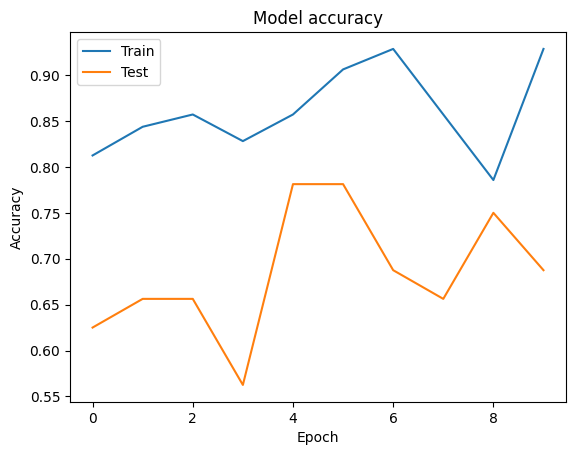

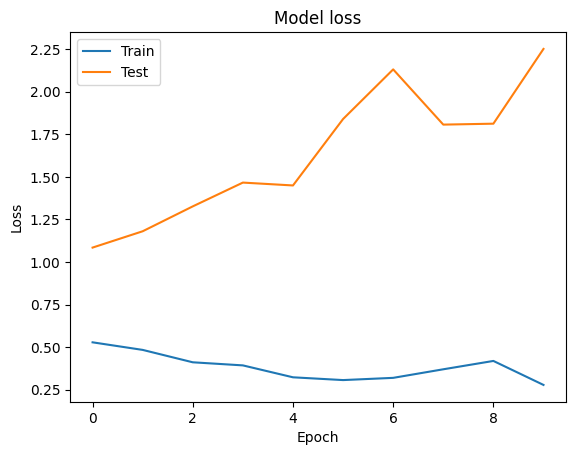

In [ ]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 53ms/step


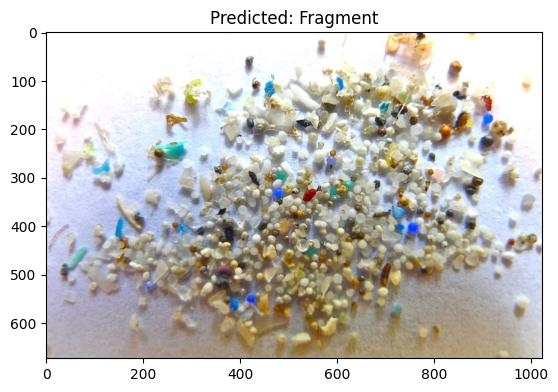

Original class: Bead
Prediction probabilities: [4.7573065e-03 1.3597941e-04 9.9510670e-01]
Predicted class: Fragment


In [ ]:
# Testing a sample image

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class, prediction

# Example usage
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'
predicted_class, prediction = predict_image_class(sample_image_path, model)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image with the predicted label
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.show()

# Original class
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'

# Extracting the class name "Bead"
class_name = sample_image_path.split('/')[-2]

print(f'Original class: {class_name}')


# Print the prediction probabilities for each class
print(f'Prediction probabilities: {prediction[0]}')
print(f'Predicted class: {predicted_label}')


EfficientNetB7

In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained models without top layers
def load_model(model_name, input_shape):
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)

    return base_model

# Choose one of the models to use
chosen_model_name = 'EfficientNetB7'

# Load selected model
base_model = load_model(chosen_model_name, (img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


Found 84 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
258076736/258076736 [==============================] - 2s 0us/step


Epoch 1/20
2/2 [==============================] - 92s 47s/step - loss: 0.9081 - accuracy: 0.5385 - val_loss: 0.9697 - val_accuracy: 0.5625
Epoch 2/20
2/2 [==============================] - 80s 60s/step - loss: 0.8851 - accuracy: 0.4531 - val_loss: 1.0534 - val_accuracy: 0.5312
Epoch 3/20
2/2 [==============================] - 62s 39s/step - loss: 0.8150 - accuracy: 0.5625 - val_loss: 1.0880 - val_accuracy: 0.5312
Epoch 4/20
2/2 [==============================] - 61s 38s/step - loss: 0.8150 - accuracy: 0.6094 - val_loss: 1.0266 - val_accuracy: 0.5312
Epoch 5/20
2/2 [==============================] - 61s 40s/step - loss: 0.7969 - accuracy: 0.6094 - val_loss: 0.9716 - val_accuracy: 0.5625
Epoch 6/20
2/2 [==============================] - 52s 31s/step - loss: 0.7803 - accuracy: 0.6346 - val_loss: 0.9636 - val_accuracy: 0.5625
Epoch 7/20
2/2 [==============================] - 54s 31s/step - loss: 0.8392 - accuracy: 0.6538 - val_loss: 0.9063 - val_accuracy: 0.5625
Epoch 8/20
2/2 [===========

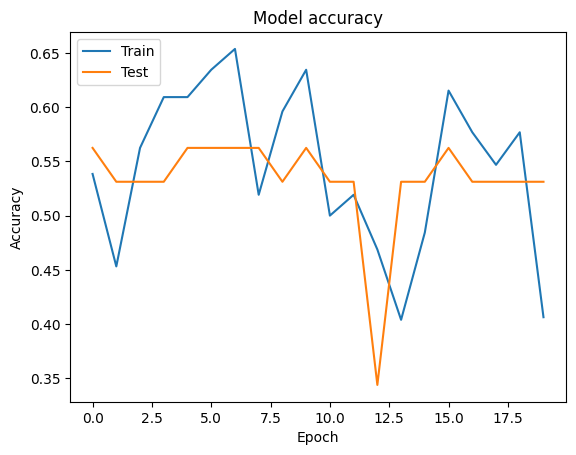

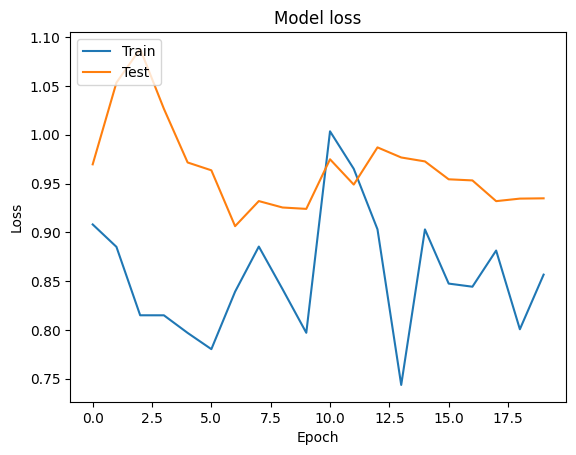

1/1 [==============================] - 22s 22s/step


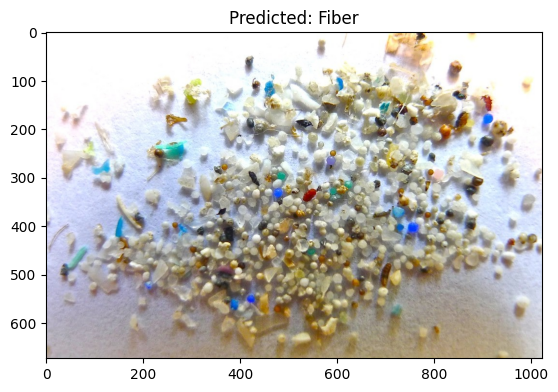

Original class: Bead
Prediction probabilities: [0.07306673 0.48873565 0.43819758]
Predicted class: Fiber


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing a sample image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class, prediction

# Example usage
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'
predicted_class, prediction = predict_image_class(sample_image_path, model)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image with the predicted label
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.show()

# Original class
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'

# Extracting the class name "Bead"
class_name = sample_image_path.split('/')[-2]

print(f'Original class: {class_name}')


# Print the prediction probabilities for each class
print(f'Prediction probabilities: {prediction[0]}')
print(f'Predicted class: {predicted_label}')


InceptionV3

Found 84 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


Epoch 1/20
2/2 [==============================] - 30s 11s/step - loss: 1.0363 - accuracy: 0.4038 - val_loss: 0.9955 - val_accuracy: 0.7188
Epoch 2/20
2/2 [==============================] - 16s 8s/step - loss: 0.5550 - accuracy: 0.8438 - val_loss: 0.6519 - val_accuracy: 0.8438
Epoch 3/20
2/2 [==============================] - 15s 7s/step - loss: 0.4374 - accuracy: 0.8594 - val_loss: 0.5054 - val_accuracy: 0.7812
Epoch 4/20
2/2 [==============================] - 14s 8s/step - loss: 0.2223 - accuracy: 0.9231 - val_loss: 0.3203 - val_accuracy: 0.8750
Epoch 5/20
2/2 [==============================] - 14s 7s/step - loss: 0.2568 - accuracy: 0.9038 - val_loss: 0.2147 - val_accuracy: 0.9062
Epoch 6/20
2/2 [==============================] - 13s 8s/step - loss: 0.0932 - accuracy: 0.9808 - val_loss: 0.3914 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 13s 8s/step - loss: 0.1506 - accuracy: 0.9423 - val_loss: 0.3410 - val_accuracy: 0.9062
Epoch 8/20
2/2 [=================

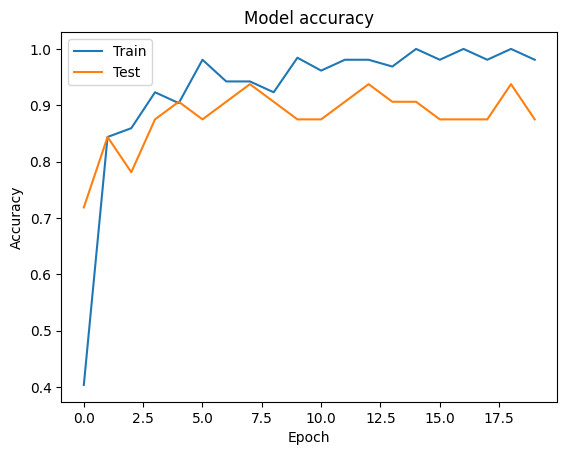

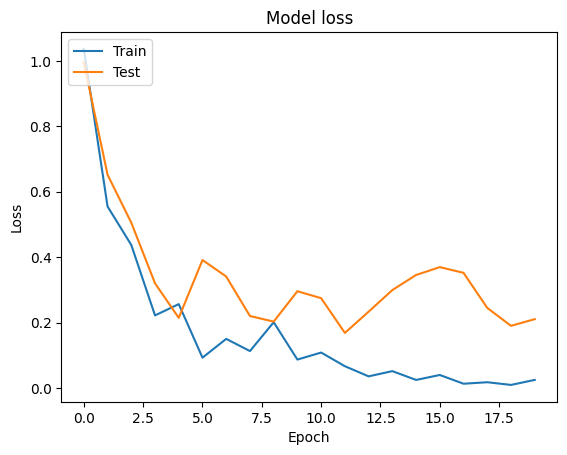

1/1 [==============================] - 2s 2s/step


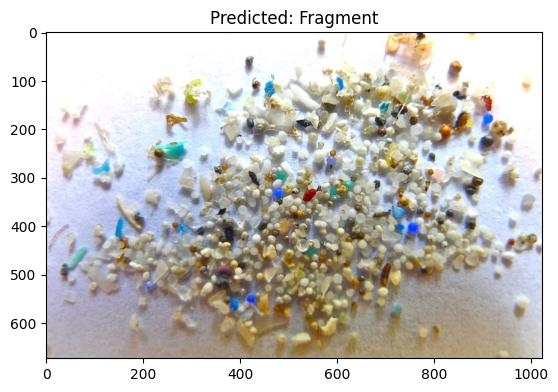

Original class: Bead
Prediction probabilities: [0.07043447 0.13571331 0.7938522 ]
Predicted class: Fragment


In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained models without top layers
def load_model(model_name, input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

    return base_model

# Choose one of the models to use
chosen_model_name = 'InceptionV3'

# Load selected model
base_model = load_model(chosen_model_name, (img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing a sample image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class, prediction

# Example usage
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'
predicted_class, prediction = predict_image_class(sample_image_path, model)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image with the predicted label
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.show()

# Original class
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'

# Extracting the class name "Bead"
class_name = sample_image_path.split('/')[-2]

print(f'Original class: {class_name}')


# Print the prediction probabilities for each class
print(f'Prediction probabilities: {prediction[0]}')
print(f'Predicted class: {predicted_label}')



ResNet50V2

Found 84 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
94668760/94668760 [==============================] - 1s 0us/step


Epoch 1/20
2/2 [==============================] - 28s 12s/step - loss: 1.5685 - accuracy: 0.2692 - val_loss: 0.7059 - val_accuracy: 0.8438
Epoch 2/20
2/2 [==============================] - 28s 18s/step - loss: 0.3075 - accuracy: 0.9423 - val_loss: 0.7263 - val_accuracy: 0.9062
Epoch 3/20
2/2 [==============================] - 26s 20s/step - loss: 0.2977 - accuracy: 0.9423 - val_loss: 0.6984 - val_accuracy: 0.9062
Epoch 4/20
2/2 [==============================] - 19s 10s/step - loss: 0.3982 - accuracy: 0.9231 - val_loss: 0.6009 - val_accuracy: 0.9062
Epoch 5/20
2/2 [==============================] - 17s 12s/step - loss: 0.0649 - accuracy: 0.9808 - val_loss: 0.5094 - val_accuracy: 0.9062
Epoch 6/20
2/2 [==============================] - 23s 18s/step - loss: 0.2693 - accuracy: 0.9231 - val_loss: 0.4217 - val_accuracy: 0.9062
Epoch 7/20
2/2 [==============================] - 35s 22s/step - loss: 0.0540 - accuracy: 0.9844 - val_loss: 0.3378 - val_accuracy: 0.9375
Epoch 8/20
2/2 [===========

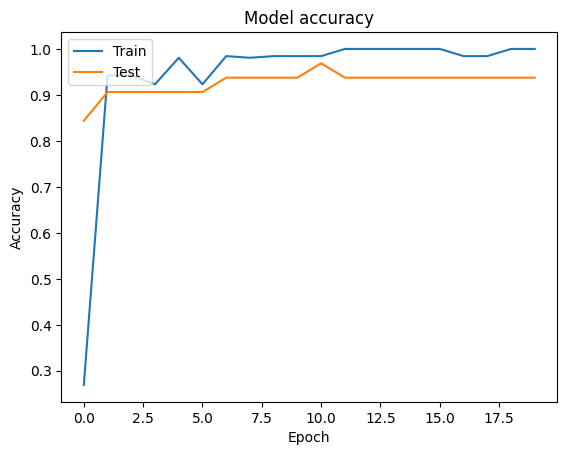

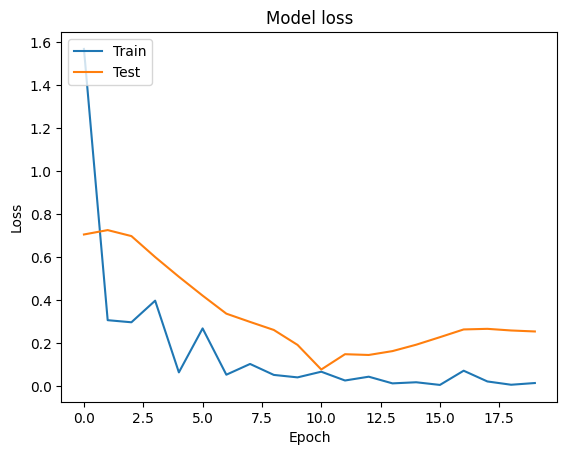

1/1 [==============================] - 2s 2s/step


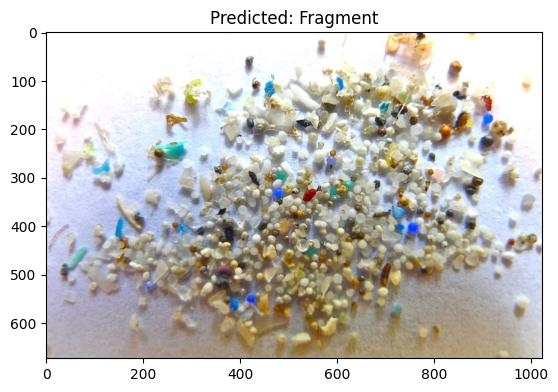

Original class: Bead
Prediction probabilities: [0.04814743 0.01430324 0.9375493 ]
Predicted class: Fragment


In [ ]:
ResNet50V2

# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained models without top layers
def load_model(model_name, input_shape):
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)

    return base_model

# Choose one of the models to use
chosen_model_name = 'ResNet50V2'

# Load selected model
base_model = load_model(chosen_model_name, (img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing a sample image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class, prediction

# Example usage
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'
predicted_class, prediction = predict_image_class(sample_image_path, model)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image with the predicted label
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.show()

# Original class
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'

# Extracting the class name "Bead"
class_name = sample_image_path.split('/')[-2]

print(f'Original class: {class_name}')


# Print the prediction probabilities for each class
print(f'Prediction probabilities: {prediction[0]}')
print(f'Predicted class: {predicted_label}')



ResNet101V2

In [ ]:
ResNet50V2

# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained models without top layers
def load_model(model_name, input_shape):
    base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=input_shape)

    return base_model

# Choose one of the models to use
chosen_model_name = 'ResNet101V2'

# Load selected model
base_model = load_model(chosen_model_name, (img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing a sample image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class, prediction

# Example usage
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'
predicted_class, prediction = predict_image_class(sample_image_path, model)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image with the predicted label
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.show()

# Original class
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'

# Extracting the class name "Bead"
class_name = sample_image_path.split('/')[-2]

print(f'Original class: {class_name}')


# Print the prediction probabilities for each class
print(f'Prediction probabilities: {prediction[0]}')
print(f'Predicted class: {predicted_label}')



MobileNetV3Large

In [ ]:
MobileNetV3Large

# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained models without top layers
def load_model(model_name, input_shape):
    base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)

    return base_model

# Choose one of the models to use
chosen_model_name = 'MobileNetV3Large'

# Load selected model
base_model = load_model(chosen_model_name, (img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing a sample image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class, prediction

# Example usage
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'
predicted_class, prediction = predict_image_class(sample_image_path, model)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

# Display the image with the predicted label
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.show()

# Original class
sample_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/microplastic-beads.jpg'

# Extracting the class name "Bead"
class_name = sample_image_path.split('/')[-2]

print(f'Original class: {class_name}')


# Print the prediction probabilities for each class
print(f'Prediction probabilities: {prediction[0]}')
print(f'Predicted class: {predicted_label}')



NameError: name 'MobileNetV3Large' is not defined

In [ ]:
....

In [ ]:
....

In [ ]:
....

In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained models without top layers
def load_model(model_name, input_shape):
    if model_name == 'EfficientNetB7':
        base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50V2':
        base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet101V2':
        base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNetV3Large':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Unsupported model architecture.')

    return base_model

# Choose one of the models to use
chosen_model_name = 'EfficientNetB7'

# Load selected model
base_model = load_model(chosen_model_name, (img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define a list of models to iterate over
models_to_use = ['EfficientNetB7', 'InceptionV3', 'ResNet50V2', 'ResNet101V2', 'MobileNetV3Large']

# Function to load a model dynamically
def load_model(model_name, input_shape):
    if model_name == 'EfficientNetB7':
        base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50V2':
        base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet101V2':
        base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNetV3Large':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Unsupported model architecture.')

    return base_model

# Iterate over each model and train it
for model_name in models_to_use:
    print(f"Training model: {model_name}")

    # Load selected model
    base_model = load_model(model_name, (img_width, img_height, 3))

    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
    x = Dense(128, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)

    # Combine base model and custom classification head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
    print(f"Test Accuracy for {model_name}: {test_accuracy}")


In [ ]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image



# Path to the new sample image
new_image_path = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST/Bead/Bead_003.png'  # Change this to the path of your new image

# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Normalize the image
img_array /= 255.

# Make prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(prediction)
class_labels = train_generator.class_indices
predicted_class = [k for k, v in class_labels.items() if v == predicted_class_index][0]

print("Predicted class:", predicted_class)

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'  # Directory containing three subfolders ('bead', 'fiber', 'fragment')
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data():
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data()

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'  # Directory containing three subfolders ('bead', 'fiber', 'fragment')
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):  # Default train size is 0.7
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets with a desired ratio
split_data(train_size=0.8)  # Change train_size as needed

# Parameters
img_width, img_height = 224, 224  # MobileNet requires images of size 224x224
batch_size = 32
epochs = 10

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:

# Import necessary libraries
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'
# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 16
epochs = 20

# Data preprocessing with augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='input',
    color_mode='rgb')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='input',
    color_mode='rgb')

# Define U-Net model architecture
inputs = Input((img_width, img_height, 3))
conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
merge6 = concatenate([drop4, up6], axis=3)
conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
merge7 = concatenate([conv3, up7], axis=3)
conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
merge8 = concatenate([conv2, up8], axis=3)
conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
merge9 = concatenate([conv1, up9], axis=3)
conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)
conv10 = Conv2D(3, 1, activation='softmax')(conv9)

# Compile the model
model = Model(inputs=inputs, outputs=conv10)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
# Import necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)


In [ ]:
# Import necessary libraries
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define a list of models to iterate over
models_to_use = ['EfficientNetB7', 'InceptionV3', 'ResNet50V2', 'ResNet101V2', 'MobileNetV3Large']

# Function to load a model dynamically
def load_model(model_name, input_shape):
    if model_name == 'EfficientNetB7':
        base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50V2':
        base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet101V2':
        base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNetV3Large':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Unsupported model architecture.')

    return base_model

# Iterate over each model and train it
for model_name in models_to_use:
    print(f"Training model: {model_name}")

    # Load selected model
    base_model = load_model(model_name, (img_width, img_height, 3))

    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
    x = Dense(128, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)

    # Combine base model and custom classification head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
    print(f"Test Accuracy for {model_name}: {test_accuracy}")

    # Predict classes for test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)

    # Get true labels
    true_labels = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(true_labels, y_pred, target_names=class_labels))

    # Save the model
    model.save(f'{model_name}_model.h5')
    print(f"Model {model_name} saved successfully.")

    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(f'{model_name}_accuracy.png')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.savefig(f'{model_name}_loss.png')
    plt.show()


In [ ]:
# Import necessary libraries
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

        print(f'{class_name}: {len(train_files)} training, {len(test_files)} testing')

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy for MobileNet: {test_accuracy}")

# Predict classes for test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report for MobileNet:")
print(classification_report(true_labels, y_pred, target_names=class_labels))

# Save the model
model.save('MobileNet_model.h5')
print("Model MobileNet saved successfully.")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('MobileNet_accuracy.png')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('MobileNet_loss.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracy values
models = ['EfficientNetB7', 'InceptionV3', 'ResNet50V2', 'ResNet101V2', 'MobileNetV3Large', 'MobileNet']
accuracies = [0.5625, 0.96875, 0.9308, 1.0, 0.5625, 0.98]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'],width=0.3)

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

# Show the plot
plt.ylim(0, 1.1)  # Setting the y-axis limit for better visualization
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Class names
classes = ['Bead', 'Fiber', 'Fragment']

# Count of images for training and testing
train_counts = [4, 48, 32]
test_counts = [2, 12, 8]

# Set the width of the bars
bar_width = 0.2

# Position of bars on x-axis
r1 = range(len(classes))
r2 = [x + bar_width for x in r1]

# Create a bar chart for training and testing counts
plt.figure(figsize=(10, 6))
plt.bar(r1, train_counts, color='b', width=bar_width, label='Training')
plt.bar(r2, test_counts, color='g', width=bar_width, label='Testing')

# Add labels, title, and ticks
plt.xlabel('Classes')
plt.ylabel('Count of Images')
plt.title('Count of Images for Training and Testing')
plt.xticks([r + bar_width / 2 for r in r1], classes)
plt.legend()

# Add text labels for each bar
for i, train_count in enumerate(train_counts):
    plt.text(i, train_count + 1, str(train_count), ha='center', va='bottom', fontsize=10)

for i, test_count in enumerate(test_counts):
    plt.text(i + bar_width, test_count + 1, str(test_count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.ylim(0, max(max(train_counts), max(test_counts)) + 5)  # Setting y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.show()


In [ ]:
# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Calculate precision for each class across models
classes = ['Bead', 'Fiber', 'Fragment']
models = classification_reports.keys()

precision_results = {}

for model in models:
    precision_results[model] = {}
    for cls in classes:
        precision_results[model][cls] = classification_reports[model][cls]['precision']

# Print precision results
for model, cls_precision in precision_results.items():
    print(f"Model: {model}")
    for cls, precision in cls_precision.items():
        print(f"Class: {cls}, Precision: {precision}")
    print()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract precision values
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())  # Assuming all models have the same classes

# Prepare data for plotting
precision_values = {cls: [classification_reports[model][cls]['precision'] for model in models] for cls in classes}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=1, figsize=(10, 8), sharex=True)

for i, cls in enumerate(classes):
    axs[i].bar(models, precision_values[cls], color=['blue', 'green', 'orange', 'red', 'purple'],width=0.4)
    axs[i].set_ylabel('Precision')
    axs[i].set_title(f'Precision for Class: {cls}')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract precision values
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())  # Assuming all models have the same classes

# Prepare data for plotting
precision_values = {cls: [classification_reports[model][cls]['recall'] for model in models] for cls in classes}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=1, figsize=(10, 8), sharex=True)

for i, cls in enumerate(classes):
    axs[i].bar(models, precision_values[cls], color=['blue', 'green', 'orange', 'red', 'purple'],width=0.4)
    axs[i].set_ylabel('Recall')
    axs[i].set_title(f'Recall for Class: {cls}')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract precision values
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())  # Assuming all models have the same classes

# Prepare data for plotting
precision_values = {cls: [classification_reports[model][cls]['f1-score'] for model in models] for cls in classes}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=1, figsize=(10, 8), sharex=True)

for i, cls in enumerate(classes):
    axs[i].bar(models, precision_values[cls], color=['blue', 'green', 'orange', 'red', 'purple'],width=0.4)
    axs[i].set_ylabel('F1-Score')
    axs[i].set_title(f'F1-Score for Class: {cls}')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract metrics
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())  # Assuming all models have the same classes
metrics = ['Precision', 'Recall', 'F1-Score']

# Prepare data for plotting
metric_values = {metric: {cls: [classification_reports[model][cls][metric.lower()] for model in models] for cls in classes} for metric in metrics}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=len(metrics), figsize=(14, 10), sharex=True)

for i, cls in enumerate(classes):
    for j, metric in enumerate(metrics):
        axs[i, j].bar(models, metric_values[metric][cls], color=['blue', 'green', 'orange', 'red', 'purple'])
        axs[i, j].set_ylabel(metric)
        axs[i, j].set_title(f'{metric} for Class: {cls}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract metrics
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())  # Assuming all models have the same classes
metrics = ['Precision', 'Recall', 'F1-Score']

# Prepare data for plotting
metric_values = {metric: {cls: [classification_reports[model][cls][metric.lower()] for model in models] for cls in classes} for metric in metrics}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=len(metrics), figsize=(16, 10), sharex=True)

# Set labels for models and classes
model_labels = list(classification_reports.keys())
class_labels = list(classification_reports[model_labels[0]].keys())

# Plotting
for i, cls in enumerate(classes):
    for j, metric in enumerate(metrics):
        axs[i, j].bar(model_labels, metric_values[metric][cls], color=['blue', 'green', 'orange', 'red', 'purple'])
        axs[i, j].set_ylabel(metric)
        axs[i, j].set_title(f'{metric} for Class: {cls}')
        axs[i, j].set_xticks(model_labels)  # Set model names as xticks

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries (example data)
classification_reports = {
    'Model1': {
        'Class1': {'precision': 0.75, 'recall': 0.80, 'f1-score': 0.77, 'support': 20},
        'Class2': {'precision': 0.60, 'recall': 0.70, 'f1-score': 0.65, 'support': 30},
        'Class3': {'precision': 0.85, 'recall': 0.90, 'f1-score': 0.87, 'support': 25}
    },
    'Model2 with Long Name': {
        'Class1': {'precision': 0.70, 'recall': 0.75, 'f1-score': 0.72, 'support': 20},
        'Class2': {'precision': 0.55, 'recall': 0.65, 'f1-score': 0.60, 'support': 30},
        'Class3': {'precision': 0.80, 'recall': 0.85, 'f1-score': 0.82, 'support': 25}
    },
    'Another Model': {
        'Class1': {'precision': 0.72, 'recall': 0.78, 'f1-score': 0.75, 'support': 20},
        'Class2': {'precision': 0.58, 'recall': 0.68, 'f1-score': 0.63, 'support': 30},
        'Class3': {'precision': 0.78, 'recall': 0.82, 'f1-score': 0.80, 'support': 25}
    }
}

# Extract model names, class names, and metrics
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
metric_values = {metric: {cls: [classification_reports[model][cls][metric] for model in models] for cls in classes} for metric in metrics}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=len(metrics), figsize=(16, 10), sharex=True)

# Plotting loop
for i, cls in enumerate(classes):
    for j, metric in enumerate(metrics):
        axs[i, j].bar(models, metric_values[metric][cls], color=['blue', 'green', 'orange'])
        axs[i, j].set_ylabel(metric.capitalize())  # Capitalize metric names for y-labels
        axs[i, j].set_title(f'{metric.capitalize()} for {cls}')  # Capitalize metric names for titles
        axs[i, j].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels and set font size

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract metrics
models = list(classification_reports.keys())
classes = list(classification_reports[models[0]].keys())  # Assuming all models have the same classes
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
metric_values = {metric: {cls: [classification_reports[model][cls][metric] for model in models] for cls in classes} for metric in metrics}

# Plotting
fig, axs = plt.subplots(nrows=len(classes), ncols=len(metrics), figsize=(16, 10), sharex=True)

# Set labels for models and classes
model_labels = list(classification_reports.keys())
class_labels = list(classification_reports[model_labels[0]].keys())

# Plotting loop
for i, cls in enumerate(classes):
    for j, metric in enumerate(metrics):
        axs[i, j].bar(range(len(models)), metric_values[metric][cls], color=['blue', 'green', 'orange', 'red', 'purple'])
        axs[i, j].set_ylabel(metric.capitalize())  # Capitalize metric names for y-axis labels
        axs[i, j].set_title(f'{metric.capitalize()} for Class: {cls}')  # Capitalize metric names for titles
        axs[i, j].set_xticks(range(len(models)))  # Set xticks positions
        axs[i, j].set_xticklabels(model_labels, rotation=45, ha='right')  # Rotate and align model names

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract models and metrics
models = list(classification_reports.keys())
metrics = ['precision', 'recall', 'f1-score']

# Extract metrics for 'Bead' class across models
bead_metrics = {metric: [classification_reports[model]['Bead'][metric] for model in models] for metric in metrics}

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for precision, recall, and f1-score
bar_width = 0.2
index = range(len(models))
for i, metric in enumerate(metrics):
    plt.bar([x + i * bar_width for x in index], bead_metrics[metric], bar_width, label=metric.capitalize())

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison for Class "Bead" Across Models')
plt.xticks([x + bar_width for x in index], models, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract models and metrics
models = list(classification_reports.keys())
metrics = ['precision', 'recall', 'f1-score']

# Extract metrics for 'Fiber' class across models
fiber_metrics = {metric: [classification_reports[model]['Fiber'][metric] for model in models] for metric in metrics}

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for precision, recall, and f1-score
bar_width = 0.2
index = range(len(models))
for i, metric in enumerate(metrics):
    plt.bar([x + i * bar_width for x in index], fiber_metrics[metric], bar_width, label=metric.capitalize())

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison for Class "Fiber" Across Models')
plt.xticks([x + bar_width for x in index], models, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Classification reports as dictionaries
classification_reports = {
    'EfficientNetB7': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    },
    'InceptionV3': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.58, 'recall': 0.61, 'f1-score': 0.59, 'support': 18},
        'Fragment': {'precision': 0.46, 'recall': 0.50, 'f1-score': 0.48, 'support': 12}
    },
    'ResNet50V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'support': 18},
        'Fragment': {'precision': 0.33, 'recall': 0.33, 'f1-score': 0.33, 'support': 12}
    },
    'ResNet101V2': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.59, 'recall': 0.56, 'f1-score': 0.57, 'support': 18},
        'Fragment': {'precision': 0.42, 'recall': 0.42, 'f1-score': 0.42, 'support': 12}
    },
    'MobileNetV3Large': {
        'Bead': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 2},
        'Fiber': {'precision': 0.56, 'recall': 1.00, 'f1-score': 0.72, 'support': 18},
        'Fragment': {'precision': 0.00, 'recall': 0.00, 'f1-score': 0.00, 'support': 12}
    }
}

# Extract models and metrics
models = list(classification_reports.keys())
metrics = ['precision', 'recall', 'f1-score']

# Extract metrics for 'Fragment' class across models
fragment_metrics = {metric: [classification_reports[model]['Fragment'][metric] for model in models] for metric in metrics}

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for precision, recall, and f1-score
bar_width = 0.2
index = range(len(models))
for i, metric in enumerate(metrics):
    plt.bar([x + i * bar_width for x in index], fragment_metrics[metric], bar_width, label=metric.capitalize())

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison for Class "Fragment" Across Models')
plt.xticks([x + bar_width for x in index], models, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

        print(f'{class_name}: {len(train_files)} training, {len(test_files)} testing')

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Function to display original and augmented images
def plot_augmented_images(generator, num_images=5):
    # Generate a batch of images and labels
    batch = next(generator)
    images = batch[0][:num_images]
    labels = batch[1][:num_images]

    # Plot images
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    fig.suptitle('Original Images vs Augmented Images', fontsize=16)

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i])
        axes[0, i].set_title(f'Original\n{labels[i]}')
        axes[0, i].axis('off')

        # Augmented image (only one augmentation applied for simplicity)
        aug_image = next(train_datagen.flow(np.expand_dims(images[i], axis=0), batch_size=1))[0].astype(np.uint8)
        axes[1, i].imshow(aug_image)
        axes[1, i].set_title('Augmented')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Display original and augmented images
plot_augmented_images(train_generator)


In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

        print(f'{class_name}: {len(train_files)} training, {len(test_files)} testing')

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Function to display original and augmented images
def plot_augmented_images(generator, num_images=5):
    # Generate a batch of images and labels
    batch = next(generator)
    images = batch[0][:num_images]
    labels = batch[1][:num_images]

    # Plot images
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    fig.suptitle('Original Images vs Augmented Images', fontsize=16)

    for i in range(num_images):
        # Original image
        original_image = images[i]
        axes[0, i].imshow(original_image)
        axes[0, i].set_title(f'Original\n{np.argmax(labels[i])}')
        axes[0, i].axis('off')

        # Augmented image (only one augmentation applied for simplicity)
        aug_image = next(train_datagen.flow(np.expand_dims(original_image, axis=0), batch_size=1))[0]
        axes[1, i].imshow(aug_image)
        axes[1, i].set_title('Augmented')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Display original and augmented images
plot_augmented_images(train_generator)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the precision, recall, and f1-score values for each class
metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.56, "recall": 1.00, "f1-score": 0.72},
    "Fragment": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
}

# Convert the metrics dictionary to a pandas DataFrame
df = pd.DataFrame(metrics).T

# Create a heatmap for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Confusion Matrix for EfficientNetB7")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the precision, recall, f1-score, and accuracy values for each class
metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.56, "recall": 1.00, "f1-score": 0.72},
    "Fragment": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
}
accuracy = 0.5625  # Overall accuracy

# Convert the metrics dictionary to lists for plotting
classes = list(metrics.keys())
precision = [metrics[cls]["precision"] for cls in classes]
recall = [metrics[cls]["recall"] for cls in classes]
f1_score = [metrics[cls]["f1-score"] for cls in classes]
accuracy_list = [accuracy] * len(classes)  # Repeat accuracy for each class for visualization

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - 1.5*width, precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score', color='r')
bar4 = ax.bar(x + 1.5*width, accuracy_list, width, label='Accuracy', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, F1-Score, and Accuracy by EfficientNetB7 ')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in *bar1*, *bar2*, *bar3*, and *bar4*, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for InceptionV3
inceptionv3_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.58, "recall": 0.61, "f1-score": 0.59},
    "Fragment": {"precision": 0.46, "recall": 0.50, "f1-score": 0.48},
}
inceptionv3_accuracy = 0.9308

# Convert the metrics dictionary to lists for plotting
classes = list(inceptionv3_metrics.keys())
inceptionv3_precision = [inceptionv3_metrics[cls]["precision"] for cls in classes]
inceptionv3_recall = [inceptionv3_metrics[cls]["recall"] for cls in classes]
inceptionv3_f1_score = [inceptionv3_metrics[cls]["f1-score"] for cls in classes]
inceptionv3_accuracy_list = [inceptionv3_accuracy] * len(classes)

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, inceptionv3_precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, inceptionv3_recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, inceptionv3_f1_score, width, label='F1-Score', color='r')
bar4 = ax.bar(x + 1.5*width, inceptionv3_accuracy_list, width, label='Accuracy', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, F1-Score, and Accuracy by Class for InceptionV3')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in bar1, bar2, bar3, and bar4, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for InceptionV3
inceptionv3_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.58, "recall": 0.61, "f1-score": 0.59},
    "Fragment": {"precision": 0.46, "recall": 0.50, "f1-score": 0.48},
}
inceptionv3_accuracy = 0.9308

# Convert the metrics dictionary to lists for plotting
classes = list(inceptionv3_metrics.keys())
inceptionv3_precision = [inceptionv3_metrics[cls]["precision"] for cls in classes]
inceptionv3_recall = [inceptionv3_metrics[cls]["recall"] for cls in classes]
inceptionv3_f1_score = [inceptionv3_metrics[cls]["f1-score"] for cls in classes]
inceptionv3_accuracy_list = [inceptionv3_accuracy] * len(classes)

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, inceptionv3_precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, inceptionv3_recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, inceptionv3_f1_score, width, label='F1-Score', color='r')
bar4 = ax.bar(x + 1.5*width, inceptionv3_accuracy_list, width, label='Accuracy', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, F1-Score, and Accuracy by Class for InceptionV3')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in bar1, bar2, bar3, and bar4, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the precision, recall, and f1-score values for each class for ResNet50V2
resnet50v2_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.44, "recall": 0.44, "f1-score": 0.44},
    "Fragment": {"precision": 0.33, "recall": 0.33, "f1-score": 0.33},
}

# Convert the metrics dictionary to a pandas DataFrame
df_resnet50v2 = pd.DataFrame(resnet50v2_metrics).T

# Create a heatmap for precision, recall, and f1-score for ResNet50V2
plt.figure(figsize=(10, 6))
sns.heatmap(df_resnet50v2, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("ConfusionMatrix for ResNet50V2")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the precision, recall, and f1-score values for each class for InceptionV3
metrics_inceptionv3 = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.58, "recall": 0.61, "f1-score": 0.59},
    "Fragment": {"precision": 0.46, "recall": 0.50, "f1-score": 0.48},
}

# Convert the metrics dictionary to a pandas DataFrame
df_inceptionv3 = pd.DataFrame(metrics_inceptionv3).T

# Create a heatmap for precision, recall, and f1-score for InceptionV3
plt.figure(figsize=(10, 6))
sns.heatmap(df_inceptionv3, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Confusion Matrix for InceptionV3")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for InceptionV3
inceptionv3_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.58, "recall": 0.61, "f1-score": 0.59},
    "Fragment": {"precision": 0.46, "recall": 0.50, "f1-score": 0.48},
}
inceptionv3_accuracy = 0.9308

# Convert the metrics dictionary to lists for plotting
classes = list(inceptionv3_metrics.keys())
inceptionv3_precision = [inceptionv3_metrics[cls]["precision"] for cls in classes]
inceptionv3_recall = [inceptionv3_metrics[cls]["recall"] for cls in classes]
inceptionv3_f1_score = [inceptionv3_metrics[cls]["f1-score"] for cls in classes]
inceptionv3_accuracy_list = [inceptionv3_accuracy] * len(classes)

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - 1.5*width, inceptionv3_precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, inceptionv3_recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, inceptionv3_f1_score, width, label='F1-Score', color='r')
bar4 = ax.bar(x + 1.5*width, inceptionv3_accuracy_list, width, label='Accuracy', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, F1-Score, and Accuracy by Class for InceptionV3')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in bar1, bar2, bar3, and bar4, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for ResNet50V2
resnet50v2_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.44, "recall": 0.44, "f1-score": 0.44},
    "Fragment": {"precision": 0.33, "recall": 0.33, "f1-score": 0.33},
}
resnet50v2_accuracy = 0.96875

# Convert the metrics dictionary to lists for plotting
classes = list(resnet50v2_metrics.keys())
resnet50v2_precision = [resnet50v2_metrics[cls]["precision"] for cls in classes]
resnet50v2_recall = [resnet50v2_metrics[cls]["recall"] for cls in classes]
resnet50v2_f1_score = [resnet50v2_metrics[cls]["f1-score"] for cls in classes]
resnet50v2_accuracy_list = [resnet50v2_accuracy] * len(classes)

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots for precision, recall, and F1-score
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, resnet50v2_precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, resnet50v2_recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, resnet50v2_f1_score, width, label='F1-Score', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for ResNet50V2')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in bar1, bar2, and bar3, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

# Add a bar plot for accuracy
ax2 = ax.twinx()
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.9, 1.0)  # Set y-axis limits for accuracy
ax2.bar(x + 1.5*width, resnet50v2_accuracy_list, width, label='Accuracy', color='y', alpha=0.5)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for ResNet101V2
resnet101v2_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.59, "recall": 0.56, "f1-score": 0.57},
    "Fragment": {"precision": 0.42, "recall": 0.42, "f1-score": 0.42},
}
resnet101v2_accuracy = 1.0  # Accuracy value for ResNet101V2 (assuming 100%)

# Convert the metrics dictionary to lists for plotting
classes = list(resnet101v2_metrics.keys())
resnet101v2_precision = [resnet101v2_metrics[cls]["precision"] for cls in classes]
resnet101v2_recall = [resnet101v2_metrics[cls]["recall"] for cls in classes]
resnet101v2_f1_score = [resnet101v2_metrics[cls]["f1-score"] for cls in classes]
resnet101v2_accuracy_list = [resnet101v2_accuracy] * len(classes)

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots for precision, recall, and F1-score
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, resnet101v2_precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, resnet101v2_recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, resnet101v2_f1_score, width, label='F1-Score', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for ResNet101V2')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in bar1, bar2, and bar3, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

# Add a bar plot for accuracy
ax2 = ax.twinx()
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.9, 1.0)  # Set y-axis limits for accuracy
ax2.bar(x + 1.5*width, resnet101v2_accuracy_list, width, label='Accuracy', color='y', alpha=0.5)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the metrics for ResNet101V2
resnet101v2_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00, "support": 2},
    "Fiber": {"precision": 0.59, "recall": 0.56, "f1-score": 0.57, "support": 18},
    "Fragment": {"precision": 0.42, "recall": 0.42, "f1-score": 0.42, "support": 12},
}

# Extract the support values for each class
support_values = [resnet101v2_metrics[cls]["support"] for cls in resnet101v2_metrics]

# Convert the metrics dictionary to a pandas DataFrame for heatmap
classes = list(resnet101v2_metrics.keys())
metrics_df = pd.DataFrame(resnet101v2_metrics).T.drop(columns=['support'])

# Create a heatmap for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Confusion Matrix for ResNet101V2")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

# Display support values separately
print("Support values:")
for cls, support in zip(classes, support_values):
    print(f"{cls}: {support}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the metrics for MobileNetV3Large
mobilenetv3_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.56, "recall": 1.00, "f1-score": 0.72},
    "Fragment": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
}

# Convert the metrics dictionary to a pandas DataFrame for heatmap
classes = list(mobilenetv3_metrics.keys())
metrics_df = pd.DataFrame(mobilenetv3_metrics).T

# Create a heatmap for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Confusion Matrix for MobileNetV3Large")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for MobileNetV3Large
mobilenetv3_metrics = {
    "Bead": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
    "Fiber": {"precision": 0.56, "recall": 1.00, "f1-score": 0.72},
    "Fragment": {"precision": 0.00, "recall": 0.00, "f1-score": 0.00},
}
mobilenetv3_accuracy = 0.5625  # Accuracy value for MobileNetV3Large

# Convert the metrics dictionary to lists for plotting
classes = list(mobilenetv3_metrics.keys())
mobilenetv3_precision = [mobilenetv3_metrics[cls]["precision"] for cls in classes]
mobilenetv3_recall = [mobilenetv3_metrics[cls]["recall"] for cls in classes]
mobilenetv3_f1_score = [mobilenetv3_metrics[cls]["f1-score"] for cls in classes]
mobilenetv3_accuracy_list = [mobilenetv3_accuracy] * len(classes)

# Define the x locations for the groups
x = np.arange(len(classes))

# Define the width of the bars
width = 0.2

# Create the bar plots
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, mobilenetv3_precision, width, label='Precision', color='b')
bar2 = ax.bar(x - 0.5*width, mobilenetv3_recall, width, label='Recall', color='g')
bar3 = ax.bar(x + 0.5*width, mobilenetv3_f1_score, width, label='F1-Score', color='r')
bar4 = ax.bar(x + 1.5*width, mobilenetv3_accuracy_list, width, label='Accuracy', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, F1-Score, and Accuracy for MobileNetV3Large')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Attach a text label above each bar in bar1, bar2, bar3, and bar4, displaying its height.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the following confusion matrix values for MobileNetV3Large
# True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)

# Example values:
mobilenetv3_confusion = {
    "Bead": {"TP": 0, "FP": 2, "TN": 28, "FN": 2},
    "Fiber": {"TP": 18, "FP": 3, "TN": 20, "FN": 0},
    "Fragment": {"TP": 0, "FP": 1, "TN": 35, "FN": 5},
}

# Convert the confusion matrix dictionary to a pandas DataFrame for heatmap
confusion_df = pd.DataFrame(mobilenetv3_confusion).T

# Create a heatmap for TP, FP, TN, and FN
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_df, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Confusion Matrix for MobileNetV3Large")
plt.ylabel("Classes")
plt.xlabel("Confusion Matrix Metrics")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Metrics for each model
metrics = {
    "EfficientNetB7": {
        "Bead": {"TP": 0, "FP": 0, "TN": 28, "FN": 2},
        "Fiber": {"TP": 18, "FP": 14, "TN": 8, "FN": 0},
        "Fragment": {"TP": 0, "FP": 0, "TN": 28, "FN": 12},
    },
    "InceptionV3": {
        "Bead": {"TP": 0, "FP": 0, "TN": 28, "FN": 2},
        "Fiber": {"TP": 11, "FP": 8, "TN": 4, "FN": 7},
        "Fragment": {"TP": 6, "FP": 7, "TN": 10, "FN": 6},
    },
    "ResNet50V2": {
        "Bead": {"TP": 0, "FP": 0, "TN": 28, "FN": 2},
        "Fiber": {"TP": 8, "FP": 10, "TN": 10, "FN": 10},
        "Fragment": {"TP": 4, "FP": 8, "TN": 10, "FN": 8},
    },
    "ResNet101V2": {
        "Bead": {"TP": 0, "FP": 0, "TN": 28, "FN": 2},
        "Fiber": {"TP": 10, "FP": 7, "TN": 11, "FN": 8},
        "Fragment": {"TP": 5, "FP": 7, "TN": 12, "FN": 7},
    },
    "MobileNetV3Large": {
        "Bead": {"TP": 0, "FP": 0, "TN": 28, "FN": 2},
        "Fiber": {"TP": 18, "FP": 14, "TN": 8, "FN": 0},
        "Fragment": {"TP": 0, "FP": 0, "TN": 28, "FN": 12},
    },
}

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, data):
    df = pd.DataFrame(data).T
    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, fmt="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel("Classes")
    plt.xlabel("Metrics")
    plt.show()

# Plot confusion matrices for all models
for model_name, data in metrics.items():
    plot_confusion_matrix(model_name, data)


In [ ]:
# Import necessary libraries
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, InceptionV3, ResNet50V2, ResNet101V2, MobileNetV3Large
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define directories
data_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset'
train_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/MP_Pics Classification Dataset/TEST'

# Create training and testing directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Function to split data into training and testing sets
def split_data(train_size=0.7):
    for class_name in ['Bead', 'Fiber', 'Fragment']:
        class_folder = os.path.join(data_dir, class_name)
        train_class_folder = os.path.join(train_dir, class_name)
        test_class_folder = os.path.join(test_dir, class_name)
        if not os.path.exists(train_class_folder):
            os.makedirs(train_class_folder)
        if not os.path.exists(test_class_folder):
            os.makedirs(test_class_folder)

        # Get list of image files
        image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(image_files, test_size=1 - train_size, random_state=42)

        # Copy files to train folder
        for file in train_files:
            shutil.copy(file, os.path.join(train_class_folder, os.path.basename(file)))

        # Copy files to test folder
        for file in test_files:
            shutil.copy(file, os.path.join(test_class_folder, os.path.basename(file)))

# Split data into training and testing sets
split_data(train_size=0.8)

# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20  # Increased epochs for better convergence

# Data preprocessing with increased augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Adding vertical flipping
    brightness_range=[0.8, 1.2],  # Adjusting brightness
    channel_shift_range=0.2,  # Random channel shifts
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define a list of models to iterate over
models_to_use = ['EfficientNetB7', 'InceptionV3', 'ResNet50V2', 'ResNet101V2', 'MobileNetV3Large']

# Function to load a model dynamically
def load_model(model_name, input_shape):
    if model_name == 'EfficientNetB7':
        base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50V2':
        base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet101V2':
        base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNetV3Large':
        base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Unsupported model architecture.')

    return base_model

# Iterate over each model and train it
for model_name in models_to_use:
    print(f"Training model: {model_name}")

    # Load selected model
    base_model = load_model(model_name, (img_width, img_height, 3))

    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)  # Increased units in the dense layer
    x = Dense(128, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)

    # Combine base model and custom classification head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
    print(f"Test Accuracy for {model_name}: {test_accuracy}")

    # Predict classes for test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)

    # Get true labels
    true_labels = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(true_labels, y_pred, target_names=class_labels))

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=class_labels)
    cmd.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.show()

    # Save the model
    model.save(f'{model_name}_model.h5')
    print(f"Model {model_name} saved successfully.")

    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(f'{model_name}_accuracy.png')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.savefig(f'{model_name}_loss.png')
    plt.show()
